# Projet de Physique Numérique :

${} \;$ 

$$\textbf{BRADAI Zakaria} \quad \quad - \quad \quad \textbf{AMRANI Ilyess}$$

$$\textbf{L2 Physique SPRINT}$$

$$\textbf{LU2PY222}$$

${} \;$

${} \;$

#    $$\text{Criticité auto-organisée et modèle du tas de sable abélien}$$


${} \;$

${} \;$

---------
---
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Introduction :

Nous allons aborder dans ce projet la criticité auto-organisée qui est un aspect omniprésent dans les phénomènes naturels tels que les séismes, les avalanches, les extinctions biologiques, les feux de forêts ...

Plus particulièrement, nous tenterons de caractériser certains aspects dynamiques des systèmes présentant une criticité auto-organisée via une simulation numérique. Pour cela nous prendrons l'exemple des **plaques tectoniques**.

La simulation numérique se fera en utilisant **le modèle du tas de sable abélien** appliqué à une grille carrée que nous appellerons **modèle BTW abélien**, il s'agit d'un modèle simple qui permet de simuler un système présentant une criticité auto-organisée et dont on étudiera la dynamique dans certains cas particuliers. Nous justifierons les restrictions que nous nous sommes imposées et nous expliciterons en détail la simulation numérique. Nous comparerons ensuite les résultats issus de la simulation numérique aux lois empiriques utilisées (*Loi de Gutenberg-Richter* et *Loi d'Omori*).

En conclusion, nous soulignerons via plusieurs exemples la présence de la criticité auto-organisée dans les phénomènes naturels et autres.


${} \;$


#### Sommaire :

${} \;$

$\textbf{I- Criticité auto-organisée et modèle du tas de sable}$

$\textbf{II- Formalisme mathématique du modèle du tas de sable}$

$\quad \quad \quad \quad \quad \textbf{  II-a Définitions}$

$\quad \quad \quad \quad \quad \textbf{  II.b- Configurations récurrentes et critère de Dhar}$

$\quad \quad \quad \quad \quad \textbf{  II.c- Méthode de calcul des configurations récurrentes équivalentes}$

$\quad \quad \quad \quad \quad \textbf{  II.d- Résumé et application au cas de la grille carrée }$

$\textbf{III- Implémentation informatique}$

$\quad \quad \quad \quad \quad \textbf{  III.a- Établissement de la classe tas\_de\_sable }$

$\quad \quad \quad \quad \quad \textbf{  III.b- Visualisation de l'élément neutre et de certaines grilles récurrentes }$

$\textbf{IV- Étude dynamique}$

$\quad \quad \quad \quad \quad \textbf{  IV.a- Modélisation et simulation numériques }$

$\quad \quad \quad \quad \quad \textbf{  IV.b- Résultats de la simulation }$

$\quad \quad \quad \quad \quad \textbf{  IV.c- Tas de sable abélien et sismologie }$

$\textbf{V- Conclusion}$

$\textbf{VI- Bibliographie}$



-------------------

# I- Criticité auto-organisée et modèle du tas de sable : 

* **Criticité auto-organisée (SOC):** propriété de certains systèmes dynamiques hors équilibre qui consiste en l'évolution  vers un état **critique**, c'est-à-dire un état dans lequel une petite perturbation cause des phénomènes d'étendue variable allant de l'invariance au changement d'état du système entier. Au voisinage de ce point le système est caractérisé par une dynamique fortement non-linéaire.

${} \; $

Ce concept a été introduit par les physiciens Per Bak, Chao Tang et Kurt Wiesenfeld (BTW) dans la note de recherche "*Self-organized criticality: An explanation of the 1/f noise*"[1] paru en 1987 dans le journal "*Physical Review Letters*" en même temps que le premier modèle du tas de sable que nous appelons modèle BTW et qui est le premier modèle affichant une criticité auto-organisée.


${} \; $

${} \; $

* **Modèle BTW :** Le modèle BTW consiste en un jeu sur un échiquier, on commence avec un échiquier vide et on peut ajouter 1 grain de sable sur chaque case. S'il y a 4 grains de sable sur une case, la pile s'effondre (on dit qu'il y a un éboulement), la case perd ses 4 grains et chacun de ses voisins directs reçoit un grain de sable. Si cette case est au bord alors il y aura un grain qui tombera "dans le vide" (sort de l'échiquier), et si la case se trouve dans un coin alors il y aura 2 grains qui tomberont "dans le vide". Si une case contient plus de 4 grains de sable, on applique la règle précédente tant que la case contient au moins 4 grains de sable.



<img src='Images/ech1.JPG' width="800" />

<img src='Images/ech2.JPG' width="800" />


Dans certaines configurations, un éboulement peut produire d'autres éboulements ce qui peut conduire à une configuration finale très différente de celle initiale, c'est dans cette mesure que se manifeste la **criticité auto-organisée (SOC)** et la **complexité**.

${} \; $

${} \; $


* **Complexité :** propriété de certains systèmes dynamiques très présente dans les phénomènes naturels, elle consiste en la variabilité de l'état du système sur une grande gamme d'échelle lors de son évolution.

${} \; $

À ce titre, le modèle BTW et le modèle du tas de sable abélien (que nous introduirons à la partie suivante) sont un exemple de systèmes complexes qui affichent une criticité auto-organisée.

De plus, au-delà du nom (le modèle est une version simplifiée et ne prend pas en compte la complexité et les processus physiques qui régissent un tas de sable), le modèle du tas de sable abélien est un modèle simple qui permet de mettre en évidence des phénomènes non triviaux.

Nous verrons à la fin de ce calepin des exemples de criticité auto-organisée et complexité dans des phénomènes naturels et leurs liens avec la dynamique du tas de sable abélien pour une grille carrée.

----------------

# II- Formalisme mathématique des tas de sable abéliens :

Nous allons dans un premier temps formaliser le modèle du tas de sable abélien non pas dans son cadre le plus général, mais dans un cadre suffisamment restreint pour alléger les notations et le formalisme, et à la fois suffisamment étendu pour que le cas de la grille carrée que nous allons étudier y soit inclus.

Le formalisme utilisé a été tirée de thèse de doctorat d'Arnaud Dartois[2].

## II.a- Définitions : 

* **Modèle de tas de sable :** Pour construire un tas de sable nous avons besoin de 2 éléments : 

$\quad \quad \quad -$ **Un support** (ou un graphe) sur lequel s'appuie le modèle, l'échiquier (grille carrée) présentée à l'introduction est le support originel introduit par Bak, Tang et Wiesensfeld néanmoins nous pouvons bâtir le modèle sur un graphe quelconque $G=(S,A)$. Pour alléger les notations et les définitions on se restreindra aux cas des graphes connexes non orientés sans boucles possédant $N+1$ sommets (le modèle est généralisable à des graphes plus complexes). 

On notera $ S= \{ x_0,x_1,\ldots,x_N\}$

$\quad \quad \quad -$ **Un puits**, il s'agit d'un sommet du support $G$ que l'on note $q$ sur lequel les grains sortants du graphe viennent se déverser. Sa particularité est que l'on peut y empiler un nombre infini de grains de sable sans qu'il ne s'éboule. Encore une fois, on se restreindra aux modèles ne possédant qu'un seul puits. Dans le cas présenté en introduction le puits correspondait au "milieu extérieur à la grille" c'est-à-dire un sommet relié aux cases des bords de la grille, une définition claire de ces éléments pour la grille carrée sera développée dans une section dédiée à la fin du chapitre.

${} \; $ 

On note **$G_q = (G,q)$ le modèle du tas de sable de support $G$ et de puits $q$.**


${} \; $ 

Dans l'exemple suivant, on considère 2 modèles de tas de sable différents de même support $G=(S,A)$ de puits différents ($q=x_0$ et $q=x_6$).

$$S = (x_0,x_1,x_2,x_3,x_4,x_5)  \quad \quad \quad \quad \quad ;  \quad \quad \quad \quad \quad 
A = \begin{pmatrix} 0&1&0&1&0&0 \\ 
1&0&0&1&0&0 \\
0&0&0&1&0&1 \\
1&1&1&0&1&0 \\ 
0&0&0&1&0&1 \\
0&0&1&0&1&0  \end{pmatrix}$$

<center><img src="Images/ExPuits.JPG" width="600" />


${} \; $ 


L'ensemble $S^* = S/\{q\}$ est appelée ensemble des *sommets réguliers*, on notera dans la suite $q=x_0$ et $S^* = \{x_1,x_2,\ldots,x_N\}$.

${} \; $ 


* **Configuration $u$ :** On associe à chaque sommet régulier $x_i\in S^*$ la valeur $u_i$ correspondant au nombre de grains de sable empilés sur ce sommet. La configuration du modèle est alors le $n$-uplet $\; \; u=(u_1,u_2,\ldots,u_N)$.

On se restreindra aux configurations positives (pour lesquelles $\forall i \in [[1;n]], \quad u_i \geq 0$) bien que le modèle soit généralisable à des configurations négatives en considérant des éboulements forcées. 

On note $U^+$ l'ensemble des configurations positives du tas de sable $G_q$.

${} \; $ 

${} \; $ 


* **Opérateurs éboulement :** On définit 2 type d'opérateurs d'éboulement, l'un agissant sur les sommets réguliers $x_i$ et l'autre sur le puits $q$.

$\quad \quad \quad \quad $ **- Opérateur d'éboulement sur le sommet $x_i$ :**  $\quad \quad \quad \Delta_i^q \quad : \left \{ \begin{array}{r c l} 
S^* & \to & \mathbb{Z} \\
x_j & \mapsto & \left \{  \begin{array}{r c l}- d_i & \; & \text{si} \quad i=j \\ d_{ij} & \; & \text{si} \quad i\ne j \end{array}  \right .
\end{array}   \right . $

$d_i$ étant le nombre de coordinence du sommet régulier $x_i$ (c.-à-d. le nombre d'arêtes reliant $x_i$ à un autre sommet du graphe) et $d_{ij}$ le nombre d'arêtes reliant les sommets réguliers $x_i$ et $x_j$.


$\quad \quad \quad \quad $ **- Opérateur d'éboulement sur le puits $q$ :**  $\quad \quad \quad \quad \beta \quad : \left \{ \begin{array}{r c l} 
S^* & \to & \mathbb{Z} \\
x_i & \mapsto & d_{iq}
\end{array}   \right . $



${} \; $ 

En reprenant l'exemple précédent avec $q=x_0$, on représente les différents opérateurs d'éboulement :


<center><img src="Images/E1.JPG" width="800" />


<center><img src="Images/E2.JPG" width="800" />


${} \; $



${} \; $ 

*Remarque :* la matrice $ (\Delta_i^q)_{i\in[[1;N]]} $ est le mineur principal de la matrice Laplacienne $\Delta$ du graphe $G$ obtenue en supprimant la ligne et la colonne qui correspondent au puits $q$, Quant au vecteur $\beta = \begin{pmatrix} 
d_{1q} \\ \vdots \\ d_{Nq}\end{pmatrix} $, il est donné par la ligne de $\Delta$ correspondant au puits $q$ privée de son élément diagonal.

On voit donc que l'ajout de boucle sur les sommets n'a pas de conséquence sur la dynamique du modèle, en particulier si on considère un graphe $G$ muni de boucles et $\bar{G}$ le même graphe sans boucles alors $G$ et $\bar{G}$ ont la même matrice Laplacienne $\Delta$, le seul rôle des boucles est d'ajouter +2 x nombre de boucles au seuil de stabilité des sommets.

Dans le cas d'un graphe avec des boucles, la définition de l'opérateur $\beta$ ne change pas alors que celle des opérateurs $\Delta_i^q$ devient en notant $b_i$ le nombre de boucles sur le sommet $x_i$ : $$\quad \Delta_i^q \quad : \left \{ \begin{array}{r c l} 
S^* & \to & \mathbb{Z} \\
x_j & \mapsto & \left \{  \begin{array}{r c l} -d_i + 2b_i & \; & \text{si} \quad i=j \\ d_{ij} & \; & \text{si} \quad i\ne j \end{array}  \right .
\end{array}   \right .$$

${} \;$




* **Conservation du nombre total de grains :** Les grains sortant des sommets réguliers $x_i$ s'empilent dans le puits $q$, cette conservation se traduit par l'équation suivante :

$$  \beta + \underset{i=1}{\overset{N}{\sum}} \Delta_i^q = 0 $$

${} \;$

${} \;$


* **Sommet stable/instable :** On dit que le sommet régulier $x_i$ est instable si : $ \; u_i \geq d_i \;$, de même $x_i$ est dit stable si $\; 0 \leq u_i < d_i$

${} \;$

${} \;$

* **Règle d'éboulement valide :**  Une règle d'éboulement est l'opération : $\quad \quad \quad \quad \quad   u^i = u + \Delta_i^q$

La règle est dite valide si le sommet $x_i$ est instable, on note $\quad u \overset{i}{>\to} u^i \quad $ ou simplement $\quad u >\to u^i$

Dans le cas où $x_i$ est stable, l'éboulement est dit forcé.

En particulier, les opérateurs d'éboulement sont commutatifs : $\quad u \overset{i}{>\to} u^i \overset{j}{>\to} u^{ij} \quad ; \quad u \overset{j}{>\to} u^j \overset{i}{>\to} u^{ji} \quad ; \quad u^{ij} = u^{ji}$

${} \;$

${} \;$

Illustration de la commutativité des opérateurs éboulement $\Delta_i^q$


<center><img src="Images/eboul1.JPG" width="800" />

<center><img src="Images/eboul2.JPG" width="800" />


${} \;$

${} \;$

* **Séquence d'éboulements :** On note $s=<x_{i_1},\ldots,x_{i_k}>$ les séquences d'éboulement valides, c'est-à-dire les éboulements (valides) successifs des sommets $x_{i_1},\ldots,x_{i_k}$ dans cet ordre. On définit la relation :

$$  u  \overset{s}{>>\to} u^k  \quad \equiv \quad  u \overset{i_1}{>\to} u^{i_1} \overset{i_2}{>\to} \cdots \overset{i_k}{>\to} u^k $$

Il est à noter que l'ensemble des séquences d'éboulement valides $s$ dépend de la configuration de départ $u$, on dit alors que $s$ est une séquence d'éboulement valide pour $u$.


La relation binaire $\overset{s}{>>\to}$ est transitive et refléxive $\forall s$. 


On dit que la configuration $u^\prime$ est atteignable à partir de la configuration $u$ s'il existe une séquence d'éboulements valide $s$ telle que : $\quad  u \overset{s}{>>\to} u^\prime  $

${} \;$

${} \;$

* **Avalanche :** Soit $u$ une configuration et $s$ une séquence d'éboulement valide pour $u$. On dit que $s$ est une avalanche si :

$$ \left \{ \begin{array}{c}  
u \overset{s}{>>\to} \hat{u} \\
\hat{u} \quad \text{est stable}
\end{array} \right . $$

On ne considérera dans la suite que des séquences d'éboulements valides, la relation $\overset{s}{>>\to}$ est de facto dite la relation d'avalanche.

**Proposition :** Toute avalanche est de taille finie, et ce, pour toute configuration initiale $u$.

**Lemme :** Par commutativité des opérateurs d'éboulement $\Delta_i^q$, on peut effectuer en parallèle plusieurs éboulements valides.

${} \;$

${} \;$

* **Stabilisation :** 

$\quad \quad \quad \quad $ **-** On note $\mapsto$ le processus de stabilisation définit tel que :

$$ u \mapsto \hat{u} \quad \equiv \quad u \overset{s}{>>\to} \hat{u} \quad / \quad  \left \{ \begin{array}{c} 
u \quad \text{est une configuration instable} \\ \hat{u} \quad  \text{est une configuration stable}  \end{array}    \right .   $$

$\quad \quad \quad \quad $ **-** On note $Stab$ l'opérateur stabilisation définit tel que :

$$ Stab(u) = \widehat{u} \quad \quad / \quad  u \mapsto \widehat{u}       $$

La stabilisation est ainsi un cas particulier d'avalanches.

Quelque soit l'avalanche $s$, la configuration stable $\hat{u}$ obtenue à partir de $u$ **est unique**, malgré que l'avalanche $s$ emprunté n'est pas unique (par commutativité des opérations d'éboulement).

On notera par la suite $\forall u \in U^+, \quad Stab(u) = \widehat{u} $.


${} \;$

${} \;$

* **Addition de tas de sables :** On note $\oplus$ l'addition de tas de sables définie telle que pour $u$ et $u^\prime$ 2 configurations quelconques :

${} \;$

$$ u \oplus u^\prime = \widehat{ u + u^\prime } $$

${} \;$


En d'autres termes la somme de 2 configurations est la somme usuelle suivie de la stabilisation de la configuration résultante.

${} \;$

${} \;$



## II.b- Configurations récurrentes et critère de Dhar :

${} \; $

${} \; $

* **Equivalence des configurations :** On définit $\quad \mathcal{R}^q \quad$ la relation binaire telle que pour $u$ et $u^\prime$ 2 configurations quelconques :

$$ u \mathcal{R}^q u^\prime \quad \iff \quad \exists  (e_0, e_1,\ldots,e_N) \in \mathbb{N}  \; / \quad u = u^\prime + e_0 \beta + \underset{i=1}{\overset{N}{\sum}} e_i \Delta_i^q  $$

C'est-à-dire qu'on peut atteindre $u^\prime$ à partir de $u$ par une série d'éboulements (valables ou forcées).

${} \; $

$ \mathcal{R}^q $ est transitive, réflexive et symétrique. $ \mathcal{R}^q $  est donc une relation d'équivalence. 

En particulier, $\mathcal{R}^q$ est la clôture symétrique de la relation d'avalanche $>>\to$ qui est elle-même la clôture transitive et réflexive de la relation d'éboulement $>\to$

On nomme les représentants naturels pour les classes d'équivalence de $ \mathcal{R}^q $ les **configurations récurrentes**.

${} \; $ 

${} \; $

On définit le processus :

$\quad \quad \quad \quad $ **-** On part de la configuration nulle $\mathcal{O}$ (c.-à-d. la configuration telle que $\forall i \in [[1;N]], \; u_i = 0$).

$\quad \quad \quad \quad $ **-** On ajoute 1 grain sur un sommet régulier tiré de manière aléatoire suivant une loi uniforme.

$\quad \quad \quad \quad $ **-** On stabilise la configuration obtenue.

$\quad \quad \quad \quad $ **-** On répète les étapes 2 et 3 à l'infini.

Ce processus définit une chaîne de Markov, Deepak Dhar a montré que sa probabilité limite est la probabilité uniforme[3], ce qui justifie le choix de la distribution des tirages des sommets à l'étape 2.

**Les configurations récurrentes sont les configurations qui apparaissent un nombre infini de fois lors de ce processus.**

${} \; $ 

${} \; $

Deepak Dhar a également proposé un critère de caractérisation des configurations récurrentes[3].

${} \; $

* **Critère de Dhar (Théorème de caractérisation des configurations récurrentes)  :**

$$ \boxed{  \quad \left ( u \; \; \text{ est une configuration récurrente}   \right) \iff  \left (  \widehat{u+\beta} = u \right)  \iff \left( u+\beta \mapsto u \right) \quad } $$

De plus lors de la stabilisation $u+\beta \mapsto u$, **chaque sommet régulier s'éboule une seule fois.** 

${} \;$

On note $Rec(G^q)$ l'ensemble des configurations récurrentes du tas $G^q$, par définition donc :

$$ Rec(G^q) = \mathbb{Z}^n / \mathcal{R}^q $$

${} \; $ 

${} \; $

* **Théorème :** **il existe une unique configuration récurrente par classe d'équivalence de la relation $\mathcal{R}^q$.**

On note $\tilde{u}$ l'unique configuration récurrente équivalente à $u$ par $\mathcal{R}^q$.


${} \; $ 

${} \; $


* **Proposition :** $\oplus$ est compatible avec $\mathcal{R}^q$, en conséquences $\oplus$ est une loi de composition interne sur $Rec(G^q)$.

${} \; $

${} \; $

* **Corollaire :** $\boxed{ \quad \left(Rec(G_q),\oplus \right)\; \; \text{est un groupe abélien.}\quad}$

${} \; $

${} \; $




## II.c- Méthode de calcul des configurations récurrentes équivalentes :

${} \;$ 

* **Théorème de l'algorithme thermique :** Soit $G^q$ un modèle de tas de sable,

$$ \exists \kappa \in \mathbb{N}, \; \forall u \in U^+, \;  \quad u \oplus \kappa\beta = u \oplus ( \underset{\kappa \; \text{fois}}{\underbrace{\beta+\ldots+\beta}}  ) = \tilde{u}   $$

${} \;$ 

Ce théorème donne un algorithme qui permet de trouver $\tilde{u}$ l'unique configuration récurrente équivalente à $u$ par la relation $\mathcal{R}^q$. 

On l'appelle **l'Algorithme thermique**.

${} \; $

Pour des configurations positives, il est de complexité en temps polynomiale au pire en $\mathcal{O}(n^4)$ 

${} \; $

<center><img src="Images/TDS.JPG" width="800" />


${} \; $

## II.d- Résumé et application au cas de la grille carrée :


${} \; $


* **Modèle du tas de sable abélien :** Il s'agit de la restriction du modèle du tas de sable $G_q$ aux configurations récurrentes uniquement.


${} \; $

#### - Choix du modèle du tas de sable abélien :



${} \; $

Comme indiqué en introduction, nous allons nous restreindre au modèle du tas de sable abélien sur une grille carrée.

Le choix de la grille carrée a été fait d'une part à cause de la simplicité de l'implémentation et d'autre part pour une question de visualisation, le jeu du tas de sable sur une grille est particulièrement intuitif, il s'agit également du support du modèle BTW.

**En somme, notre modèle n'est que la restriction du modèle BTW aux configurations abéliennes (récurrentes), en quelque sorte un "modèle BTW abélien"**.

${}\;$ 

Une question légitime se pose, *pourquoi se restreindre uniquement aux configurations récurrentes ?*

${} \; $



* **Justification du choix du modèle du tas de sable abélien :**



Nous avons trouvé que pour une modèle de tas de sable $G_q$ dont le support est un graphe non orienté et ne possédant qu'un seul puits il existe des configurations particulières, il s'agit des configurations récurrentes qui forment le groupe abélien $(Rec(G_q),\oplus)$ d'où le nom de modèle tas de sable abélien. 

${} \; $

La structure de groupe abélien offre de nombreux avantages pour l'étude de la dynamique du tas de sable :  commutativité et associativité de la somme $\oplus$ - stabilité par la loi du groupe $\oplus$ ...
${} \; $

${} \; $

De plus nous avons défini une relation d'équivalence $\mathcal{R}^q$ et nous avons montré que toute configuration $u$ est équivalente à une unique configuration récurrente $\tilde{u} \in Rec(G_q)$ par cette relation.

$$  u \mathcal{R}^q \tilde{u}  \quad \iff \quad \left ( \exists (e_0,e_1,\ldots,e_N) \in \mathbb{N} \; / \quad u = \tilde{u} + e_0 \beta +  \underset{i=1}{\overset{N}{\sum}}  e_i \Delta_i^q \right) $$

"On peut passer d'une configuration à sa configuration récurrente équivalente $\tilde{u}$ par $\mathcal{R}^q$ par une série d'éboulements (valables ou forcés)"

${} \; $
 
**Cette relation d'équivalence permet de ne pas perdre la généralité du modèle en se restreignant aux configurations récurrentes.**



${} \;$


#### - Application au cas de la grille carrée :

${} \;$

Comme nous l'avons survolé précédemment, un échiquier correspond (en termes de graphe) à une grille dont les bords sont reliés par une arête (et les coins par 2 arêtes) au puits que nous avons appelé "vide" lors de la présentation du modèle BTW. Le schéma suivant permet une meilleure visualisation dans le cas d'une grille 4x4 :


<center><img src="Images/Grille.JPG" width="800" />


${} \; $

Ainsi, tous les sommets réguliers d'une grille sont de nombre de coordinence $d = 4$, $\boxed{ \textbf{ce qui justifie le seuil de 4 grains par case.} }$

${} \; $

#### - Calcul de l'élément neutre pour une grille carrée :

${} \; $

On note $e$ l'élément neutre de notre modèle et $\mathcal{O}$ la grille nulle. Il est trivial que :$ \quad \quad \quad \quad  \mathcal{O} \mathcal{R}^q e $

Ainsi, nous pouvons calculer l'élément neutre $e$ à partir de la grille nulle via l'algorithme thermique, il reste à expliciter l'opérateur $\beta$ dans le cas de la grille carrée, reprenons sa définition :

$$\beta \quad : \left \{ \begin{array}{r c l} 
S^* & \to & \mathbb{N} \\
x_i & \mapsto & d_{iq}
\end{array}   \right .$$

Il est clair que : $\quad \quad \left \{  \begin{array}{r c l}  
d_{iq} = &2& \quad\text{si} \; x_i \; \text{est un coin} \\
d_{iq} = &1& \quad\text{si} \; x_i \; \text{est sur un bord de la grille, coins exclus} \\
d_{iq} = &0& \quad\text{sinon} 
\end{array}   \right .$

On représente schématiquement l'opérateur $\beta$ par la grille nxn possédant 2 grains à ses coins, 1 grain sur ces bords (coins exclus) et 0 grains ailleurs.


<center><img src="Images/beta44.JPG" width="600" />




Par abus de langage, on parlera de **nappage** en désignant l'opérateur $\beta$ pour une grille carrée nxn.


-----------------

# III- Implémentation informatique :

## III.a- Établissement de la classe `tas_de_sable` :

On définit une classe `AbelianSandpile` ayant les attributs suivants :

* `grid` : soit notre configuration $u$ sous forme d'un nd array.

* `abelian_grid` : soit l'équivalent récurrent $\tilde{u}$ de $u$ sous forme d'un nd array.

* `shape` : soit les dimensions de la grille dans un tuple.

* `geometry` : indique si la gille est carrée ou rectangulaire.

* `beta_grid` : contient l'opérateur $\beta$ associé sous forme d'une grille (nd array).

* `taille_avalanche` : il s'agit d'un compteur de la taille des avalanches qui se produisent dans notre grille, cet attribut nous servira lors de l'étude de la dynamique du tas de sable à la partie suivante.

* `profil` : grille contenant le nombre d'avalanches produites dans chaque case, soit le profil spatial des avalanches qui se sont produites dans la grille du tas de sable, de même cet attribut nous servira à la partie suivante.

Quant aux fonctions de la classe `AbelianSandpile`, elles se divisent en 3 types :

* Fonctions générales qui agissent un tableau nxn quelconque :

$\quad \quad \quad \quad $ **-** `topple` : définit l'opération d'éboulement sur une case (sur un sommet régulier du graphe).

$\quad \quad \quad \quad $ **-** `stabilize` : définit la stabilisation d'une grille, elle sera utilisée lors du calcul de l'élément neutre.

* Méthodes des tas de sables abéliens :

$\quad \quad \quad \quad $ **-** `__add__` : définit l'addition de configurations récurrentes.

$\quad \quad \quad \quad $ **-** `perturb` : qui est l'implémantation du processus de perturbation que l'on définira plus loin.


In [2]:
def topple(grid, x_topple, y_topple):
    """Defines the topple rule."""

    nb_topples = grid[x_topple, y_topple] // 4
    grid[x_topple, y_topple] %= 4
    grid = pour(grid, x_topple, y_topple, nb_topples)
    return grid


def pour(grid, x_topple, y_topple, nb_topples):
    """Pours toppeling grains on the neighbor cases."""

    if x_topple > 0:
        grid[x_topple - 1, y_topple] += nb_topples

    if x_topple < grid.shape[0] - 1:
        grid[x_topple + 1, y_topple] += nb_topples

    if y_topple > 0:
        grid[x_topple, y_topple - 1] += nb_topples

    if y_topple < grid.shape[1] - 1:
        grid[x_topple, y_topple + 1] += nb_topples

    return grid


def stabilize(grid):
    """Defines the stabilization of a sandpile."""

    unstable_indexes = np.array(np.where(grid >= 4))

    while len(unstable_indexes[0]) > 0:
        for i in range(0, len(unstable_indexes[0])):
            x_topple = unstable_indexes[0, i]
            y_topple = unstable_indexes[1, i]
            grid = topple(grid, x_topple, y_topple)

        unstable_indexes = np.array(np.where(grid >= 4))

    return grid


class AbelianSandpile:

    
    def __init__(self, grid):
        self.grid = grid
        self.abelian_grid = grid
        self.shape = self.grid.shape

        self.avalanches_size = 0 #np.array([])
        self.topple_profil = np.zeros(self.shape)

        if self.shape[0] == self.shape[1]:
            self.geometry = "square"

        else:
            self.geometry = "rectangle"

        self.beta_grid = np.zeros(self.shape)

        match self.geometry:
            case "square":
                for i in range(0, self.shape[0]):
                    self.beta_grid[i, 0] += 1
                    self.beta_grid[0, i] += 1
                    self.beta_grid[i, -1] += 1
                    self.beta_grid[-1, i] += 1
            case "rectangle":
                for i in range(0, self.shape[0]):
                    self.beta_grid[i, 0] += 1
                    self.beta_grid[i, -1] += 1

                for j in range(0, self.shape[1]):
                    self.beta_grid[0, j] += 1
                    self.beta_grid[-1, j] += 1

        self.thermical_algorithm()

    def stabilze_abelian_grid(self):
        '''
        Also defines the stabilization of the abelian grid
        but counts the number and size of avalanches.

        Used during the perturbation processus.
        '''

        unstable_indexes = np.array(np.where(self.abelian_grid >= 4))
    
        while len(unstable_indexes[0]) > 0:
            self.avalanches_size += unstable_indexes.size
            for i in range(0, len(unstable_indexes[0])):
                x_topple = unstable_indexes[0, i]
                y_topple = unstable_indexes[1, i]
                self.abelian_grid = topple(self.abelian_grid, x_topple, y_topple)
                self.topple_profil[x_topple, y_topple] += 1
                #self.avalanches_size = np.append(self.avalanches_size, len(unstable_indexes[0]))
            
                
            unstable_indexes = np.array(np.where(self.abelian_grid >= 4))
            ###
    

    def __add__(self, other):
        """
        Defines the addition of sandpiles.
        By default the addition of two sandpiles returns
        the addition of their abelian grids.
        """

        if hasattr(other, "abelian_grid"):
            return stabilize(self.abelian_grid + other.abelian_grid)

        else:
            raise TypeError("can only add abelian sandpile to another abelian sandpile")

    def beta_operator(self):
        """Computes beta operator application on the sandpile"""

        self.abelian_grid = stabilize(self.abelian_grid + self.beta_grid)

    def thermical_algorithm(self):
        """Computes Dhar's thermical algorithm"""

        mask = np.copy(self.abelian_grid)
        self.beta_operator()

        while not (np.array_equal(self.abelian_grid, mask)):
            mask = np.copy(self.abelian_grid)
            self.beta_operator()

    def perturb(self, N=50000):
        '''Defines ther perturbation processus on the sandpile.'''
        
        mean_hight = [np.mean(self.abelian_grid)]
        tab_avalanches_size = []
        self.avalanches_size = 0
        for i in range(N):
            x_perturb = np.random.randint(0, self.shape[0])
            y_perturb = np.random.randint(0, self.shape[1])
            self.abelian_grid[x_perturb, y_perturb] += 1
            self.stabilze_abelian_grid()
            mean_hight.append(np.mean(self.abelian_grid))
            tab_avalanches_size.append(self.avalanches_size)
            self.avalanches_size = 0 
            
        avalanches_frequency = []

        
        
        for size in tab_avalanches_size:
            avalanches_frequency.append( tab_avalanches_size.count(size))

        tab_avalanches_size = np.array(tab_avalanches_size)
        avalanches_frequency = np.array(avalanches_frequency)
        mean_hight = np.array(mean_hight)
        
        return mean_hight, tab_avalanches_size, avalanches_frequency

    def plot_grid(self):
        '''Plots the abelian grid of the sandpile.'''

        plt.figure()
        plt.imshow(self.abelian_grid, cmap='Greys')
        plt.colorbar()
        plt.show()    



## III.b- Visualisation de l'élément neutre et de certaines grilles récurrentes :

${} \;$

Prenons 4 grilles de tailles respectives 20x20, 50x50, 100x100 et 200x200 et calculons leurs éléments neutres :

In [3]:
tas20 = AbelianSandpile(np.zeros((20,20)))     #  // //  grille 20x20
tas50 = AbelianSandpile(np.zeros((50,50)))     #  // //  grille 50x50
tas100 = AbelianSandpile(np.zeros((100,100)))  #  // //  grille 100x100   
tas200 = AbelianSandpile(np.zeros((200,200)))    #  // //  grille 200x200   

<Figure size 640x480 with 0 Axes>

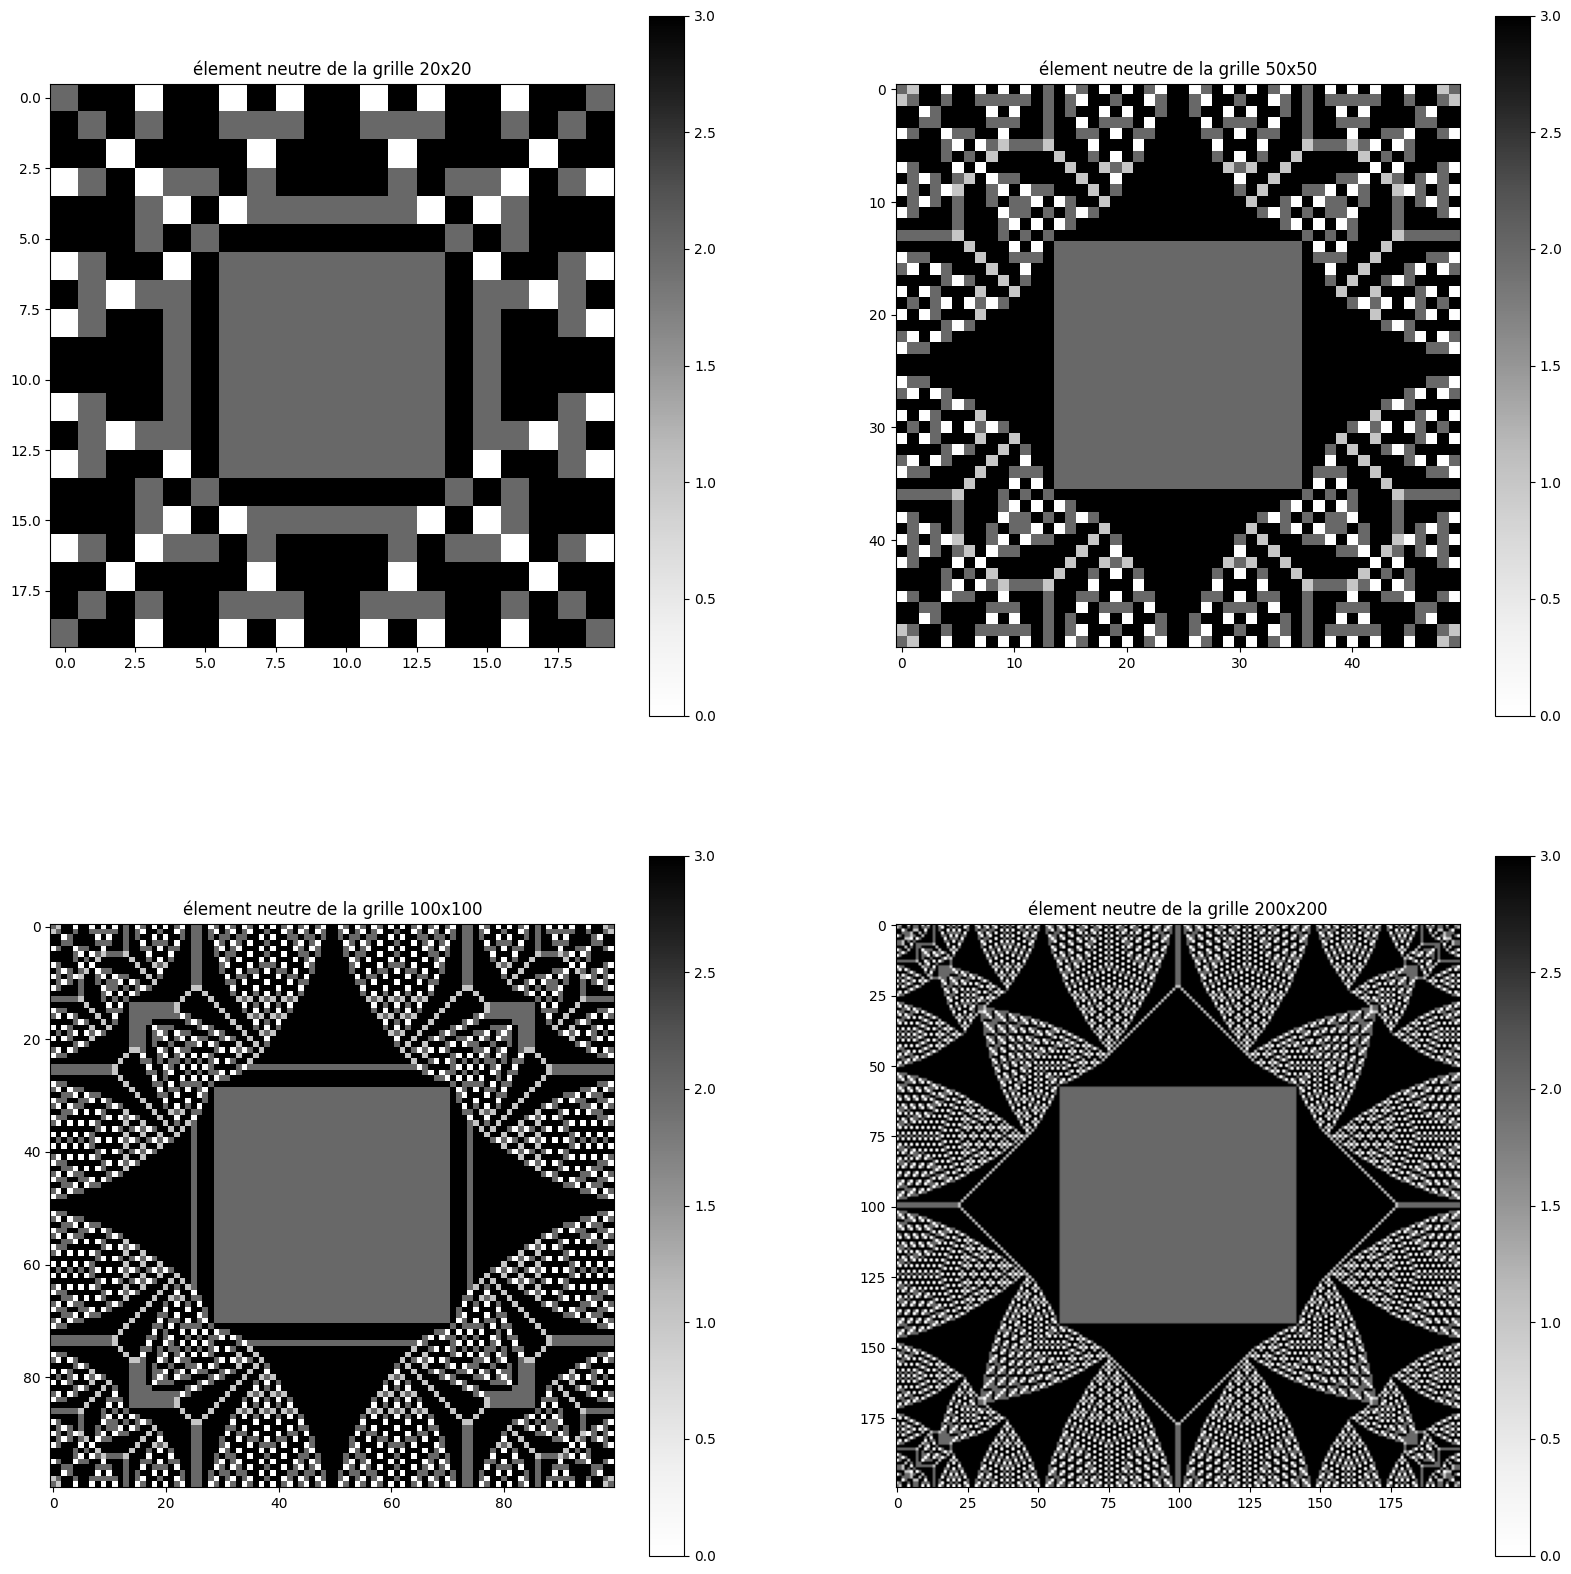

In [4]:
plt.figure()

plt.figure(figsize=[20,20])


plt.subplot(2,2,1)
plt.imshow(tas20.abelian_grid, cmap='Greys')
plt.title('élement neutre de la grille 20x20')
plt.colorbar()


plt.subplot(2,2,2)
plt.imshow(tas50.abelian_grid, cmap='Greys')
plt.title('élement neutre de la grille 50x50')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(tas100.abelian_grid, cmap='Greys')
plt.title('élement neutre de la grille 100x100')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(tas200.abelian_grid, cmap='Greys')
plt.title('élement neutre de la grille 200x200')
plt.colorbar()

plt.show()

L'élément neutre paraît assez exotique, il possède des structures fractales de plus en plus prononcées à mesure que la taille de la grille augmente, de plus il suit les mêmes symétries que la grille et possède toujours un carré central. Il possède également **une structure auto-similaire**.

Il est à noter que lors de l'application de l'algorithme thermique, la grille neutre passe par 2 étapes, une première étape où 4 structures similaires naissent aux 4 coins et se propagent jusqu'à se croiser, et une deuxième étape au cours de laquelle après cette rencontre le carré central prend forme.

Observons l'évolution de la grille nulle vers la grille abélienne :

<center><img src="Images/anim20.gif" width="500" />

<center><img src="Images/anim50.gif" width="500" />

<center><img src="Images/anim100.gif" width="500" />

<center><img src="Images/anim200.gif" width="500" />



$\;$

Certaines configurations récurrentes à l'instar de l'élément neutre présentent des structures de fractales, illustrons ce propos en considérant d'abord les grilles $\mathbb{1}$, $\mathbb{2}$ et $\mathbb{3}$ qui sont les grilles 100x100 contenant respectivement 1 et 3 grains dans chaque case. Appliquons l'opérateur $\beta$ à ces grilles :

In [5]:
grille1 = np.ones((100,100))   # grille contenant 1 grain dans toutes ses cases
grille2 = 2 * np.ones((100,100))   # grille contenant 2 grains dans toutes ses cases
grille3 = 3 * np.ones((100,100))   # grille contenant 3 grains dans toutes ses cases

tas1 = AbelianSandpile(grille1)
tas2 = AbelianSandpile(grille2)
tas3 = AbelianSandpile(grille3)

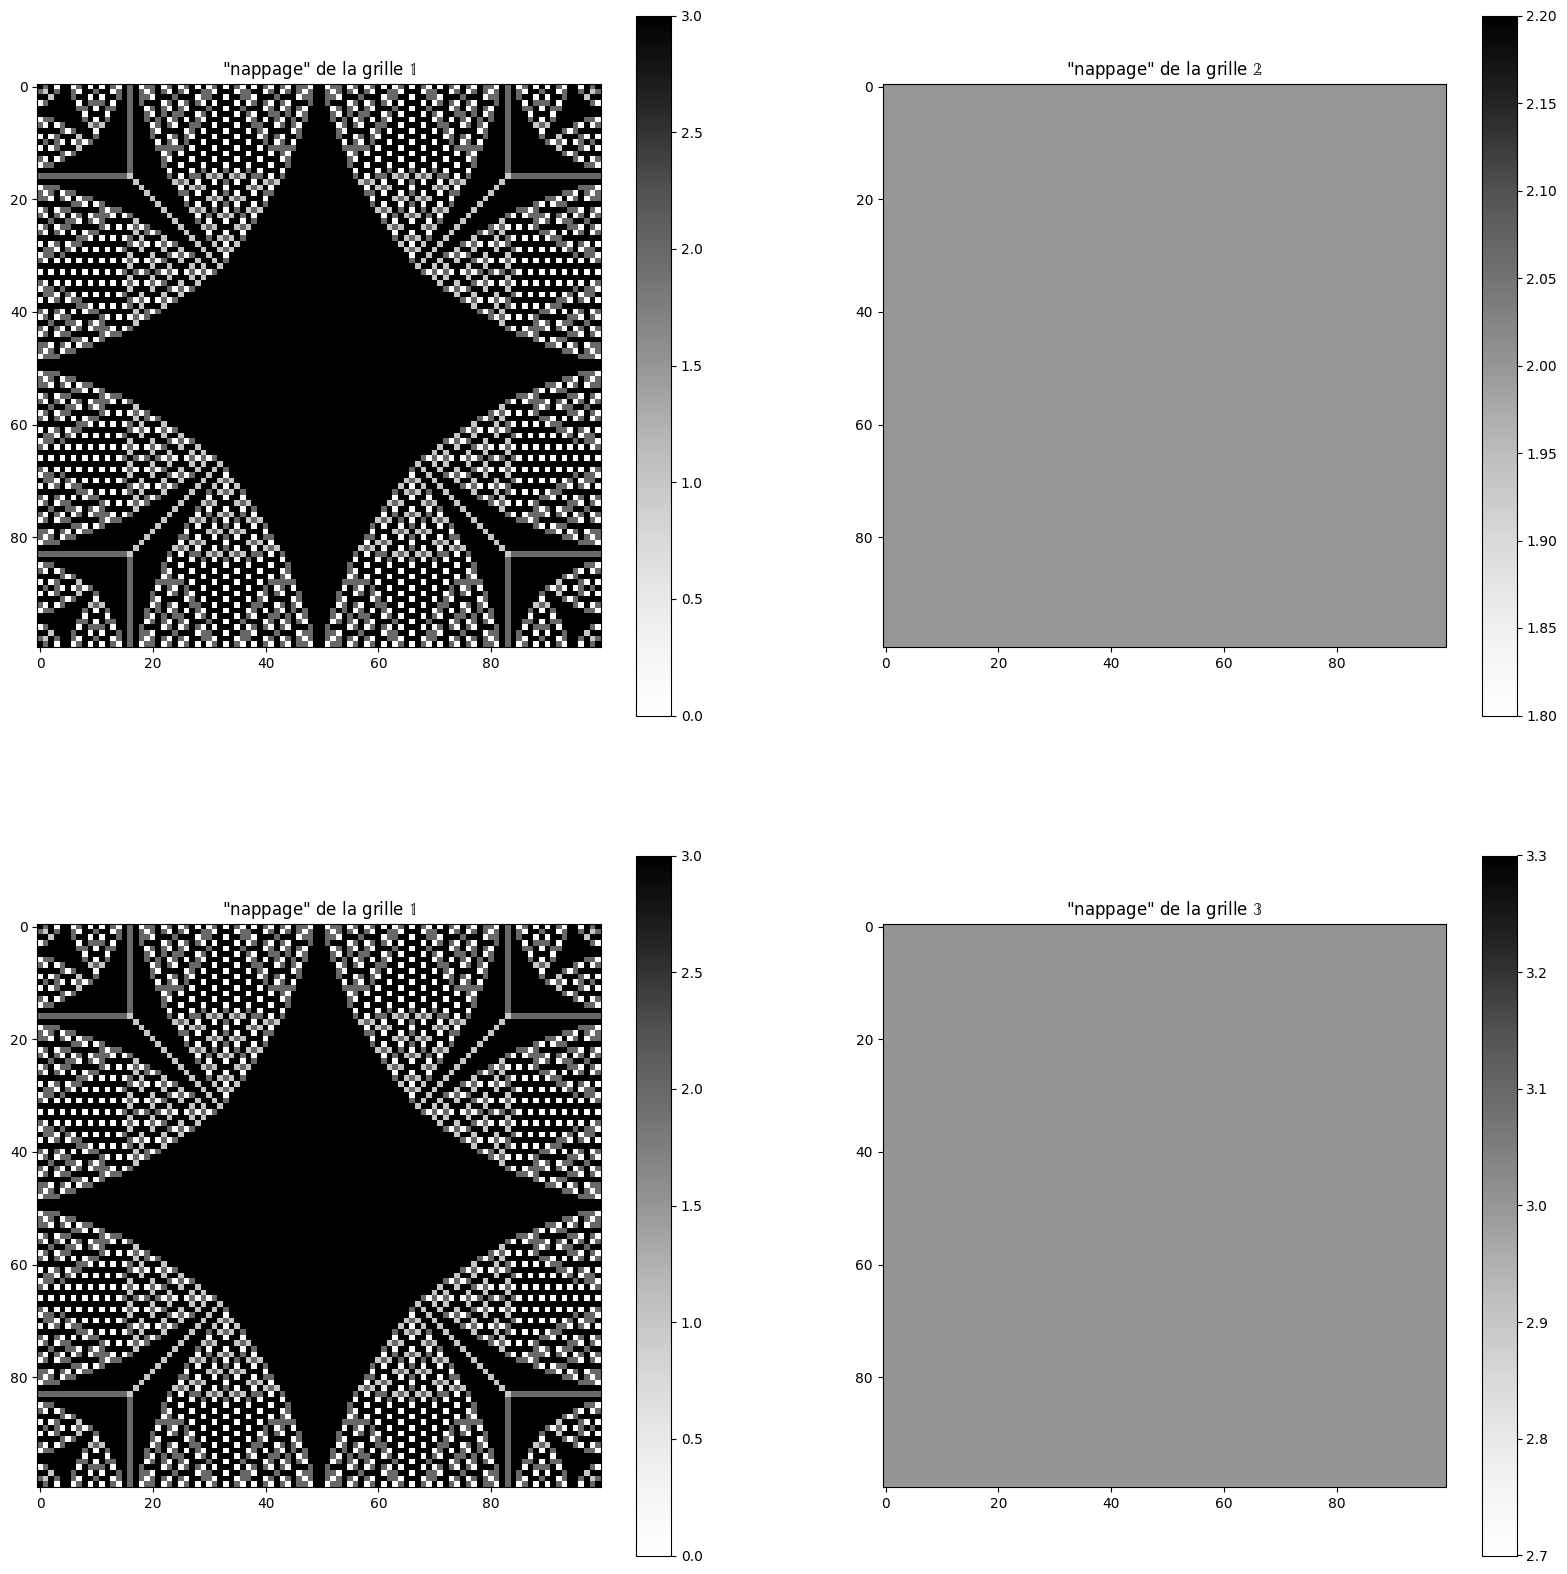

In [6]:
# On applique l'opérateur beta

tas1.beta_operator()
tas2.beta_operator()
tas3.beta_operator()

plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.imshow(tas1.abelian_grid, cmap='Greys')
plt.title(r'"nappage" de la grille $\mathbb{1}$')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(tas2.abelian_grid, cmap='Greys')
plt.title(r'"nappage" de la grille $\mathbb{2}$')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(tas1.abelian_grid, cmap='Greys')
plt.title(r'"nappage" de la grille $\mathbb{1}$')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(tas3.abelian_grid, cmap='Greys')
plt.title(r'"nappage" de la grille $\mathbb{3}$')
plt.colorbar()

plt.show()

En vertu du critère de Dhar, la grille $\mathbb{1}$ n'est pas récurrente alors que la grille $\mathbb{3}$ est récurrente.

On peut introduire une certaine relation d'ordre dans le modèle du tas de sable abélien et en tirer un moyen de générer des grilles récurrentes à partir de la grille $\mathbb{3}$, en effet on peut monter que : **toute grille obtenue par la somme $\oplus$ de la grille $\mathbb{3}$ et d'une grille quelconque est récurrente**. 

${} \;$ 

Pour l'exemple affichons les grilles récurrentes obtenues en sommant la grille $\mathbb{3}$ avec respectivement les grilles $\mathbb{1}$, $\mathbb{2}$ et $\mathbb{3}$.

In [7]:
grille1 = np.ones((100,100))   # grille contenant 1 grain dans toutes ses cases
grille2 = 2 * np.ones((100,100))   # grille contenant 2 grains dans toutes ses cases
grille3 = 3 * np.ones((100,100))   # grille contenant 3 grains dans toutes ses cases

tas1 = AbelianSandpile(grille1)
tas2 = AbelianSandpile(grille2)
tas3 = AbelianSandpile(grille3)

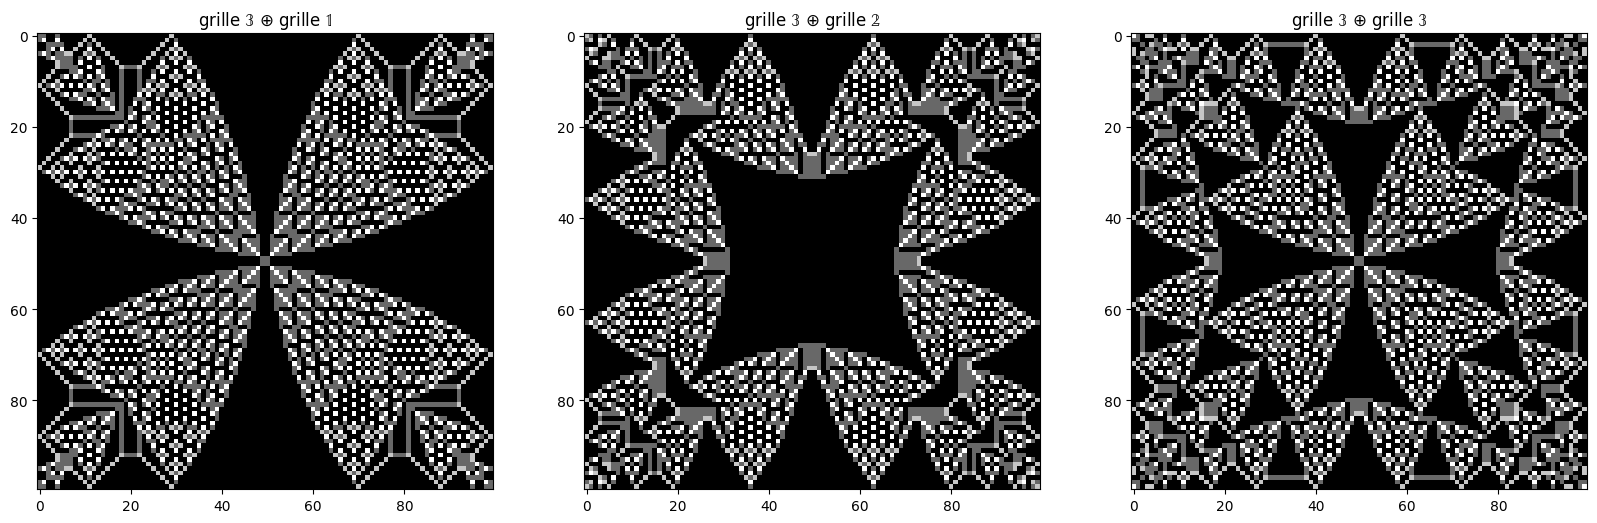

In [8]:
plt.figure(figsize=[20,20])

plt.subplot(1,3,1)
plt.imshow(tas1 + tas3, cmap='Greys')
plt.title(r'grille $\mathbb{3}$ $\oplus$ grille $\mathbb{1}$')

plt.subplot(1,3,2)
plt.imshow(tas2 + tas3, cmap='Greys')
plt.title(r'grille $\mathbb{3}$ $\oplus$ grille $\mathbb{2}$')

plt.subplot(1,3,3)
plt.imshow(tas3 + tas3, cmap='Greys')
plt.title(r'grille $\mathbb{3}$ $\oplus$ grille $\mathbb{3}$')

plt.show()

Ces grilles récurrentes présentent bien des motifs de fractales et ont les mêmes symétries qu'un carré.

${} \;$

----------------

# IV- Étude dynamique :

## IV.a- Modélisation et simulation numériques :

${} \;$

Notre but est de simuler le comportement d'un système présentant une criticité auto-organisé lors de son évolution sous l'effet de perturbations externes.


On considère un système initialement dans un état d'équilibre, intuitivement la grille qui semble correspondre est la grille nulle $\mathcal{O}$ (elle semble correspondre à l'état le plus stable de notre tas de sable). Or elle n'est pas récurrente, de ce fait on modélisera le système par sa grille récurrente équivalente, c'est-à-dire par l'élément neutre $e$.

On modélise les perturbations extérieures par l'ajout d'un grain de sable sur une case choisie aléatoirement selon une loi uniforme, d'autres termes on modélise les perturbations extérieures par le même processus Markovien à partir duquel nous avons défini le caractère récurrent d'une configuration. On sait par conséquent que l'élément neutre va réapparaître un nombre infini de fois lors de ce processus (en vertu de sa nature récurrente).

Par vue de l'esprit on se place donc dans un puits de potentiel, on ne quitte jamais ce puits et on repasse un nombre infini de fois par l'état d'équilibre, ce qui est le cas de nombreux phénomènes naturels dont on cherche à décrire certains aspects dynamiques (extinction d'espèces animales, détente des plaques tectoniques...)

${} \;$

En résumé, l'état d'équilibre (qui est l'état initial du système) est modélisé par la grille neutre $e$. Il subit des perturbations extérieures qui correspondent à l'ajout d'un grain dans une case choisie de manière aléatoire selon une loi uniforme.



${} \;$

Le processus de perturbation est implémenté via la fonction `Perturbation` qui prend en argument la durée du processus $N$ (nombre d'itérations) et renvoie 3 listes de paramètres évolutifs de la grille que sont **le nombre moyen de grains** (ou hauteur moyenne de la grille), **la taille des avalanches à chaque itération** et leur **fréquence d'apparition sur tout le processus des tailles des avalanches**.

${} \;$

Nous allons réaliser cette simulation pour les 4 grilles de tailles respectives 10x10, 20x20, 50x50 et 100x100 définies plus tôt. Le processus de perturbation se fera sur 10000 itérations, ce nombre a été choisi car il est suffisamment grand pour mettre en évidence le comportement recherché, et suffisamment petit pour que la simulation s'effectue sur une durée raisonnable.

In [9]:
# On réalise la simulation sur 10000 itérations

hauteur20, taille20, freq20 = tas20.perturb()
hauteur50, taille50, freq50 = tas50.perturb()
hauteur100, taille100, freq100 = tas100.perturb()
hauteur200, taille200, freq200 = tas200.perturb()

## IV.b- Résultats de la simulation :


#### Nombre moyen de grains de sable :

${} \;$

Visualisons dans un premier temps l'évolution du nombre moyen de grains des grilles lors du processus :



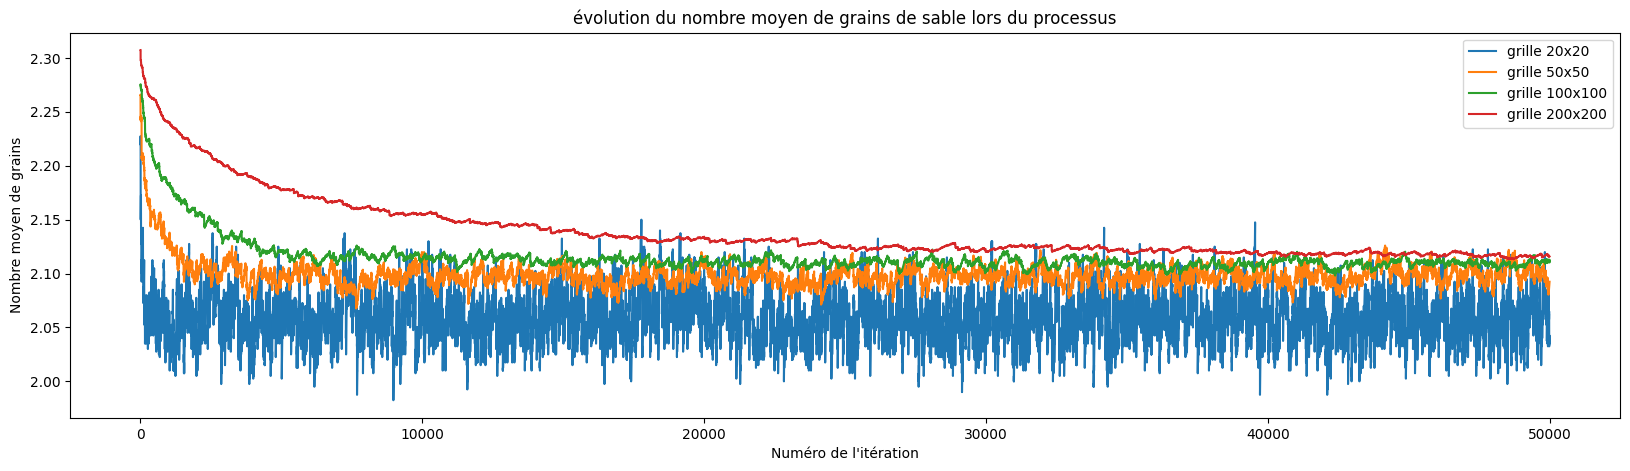

In [10]:
plt.figure(figsize=[20,5])
plt.title("évolution du nombre moyen de grains de sable lors du processus")
plt.ylabel('Nombre moyen de grains')
plt.xlabel("Numéro de l'itération")

#plt.plot(hauteur10,label='grille 10x10')
plt.plot(hauteur20,label='grille 20x20')
plt.plot(hauteur50,label='grille 50x50')
plt.plot(hauteur100,label='grille 100x100')
plt.plot(hauteur200,label='grille 200x200')

plt.legend()
plt.show()

On trouve le résultat attendu, plus la taille de la grille est grande plus les fluctuations relatives sont faibles.

Il est néanmoins une autre conclusion à tirer de ce graphique, on sait qu'en vertu de la nature récurrente de l'élément neutre $e$ il devrait apparaître un nombre infini de fois lors du processus.

Visualisons la grille 200x200 obtenue à la fin du processus de perturbation.

Hauteur moyenne de la grille 200x200 à la fin du processus = 2.115875


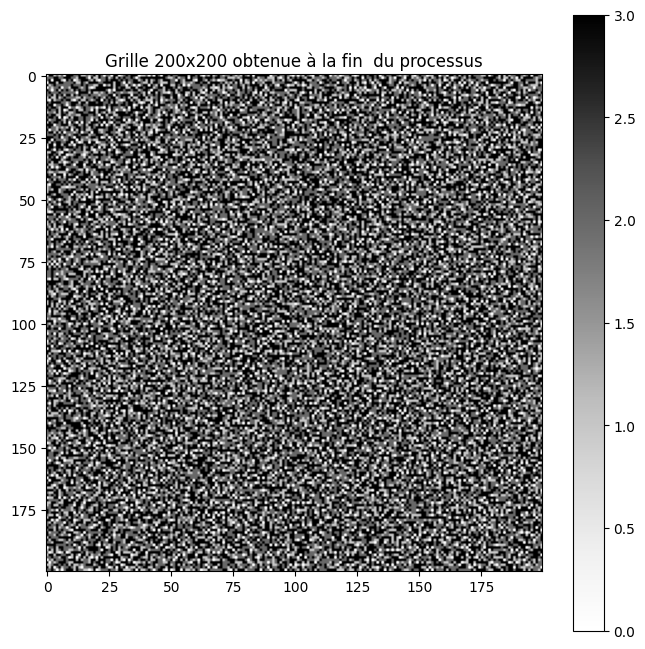

In [11]:
print("Hauteur moyenne de la grille 200x200 à la fin du processus =", np.mean(tas200.abelian_grid))


plt.figure(figsize=[8,8])


plt.imshow(tas200.abelian_grid, cmap='Greys')
plt.title('Grille 200x200 obtenue à la fin  du processus')
plt.colorbar()


plt.show()

Tout au long du processus appliqué à la grille 100x100, nous n'atteignons pas la hauteur moyenne de l'élément neutre. On en déduit qu'au cours de la perturbation, la grille 100x100 ne repasse pas par l'état d'équilibre (nous n'avons pas fait suffisamment d'itérations pour que l'élément neutre réapparaisse au moins une fois).

${} \; $

#### Nombre d'éboulements par case :

${} \;$

Nous pouvons également visualiser le nombre d'éboulements qui se sont produits dans chaque case au cours du processus.


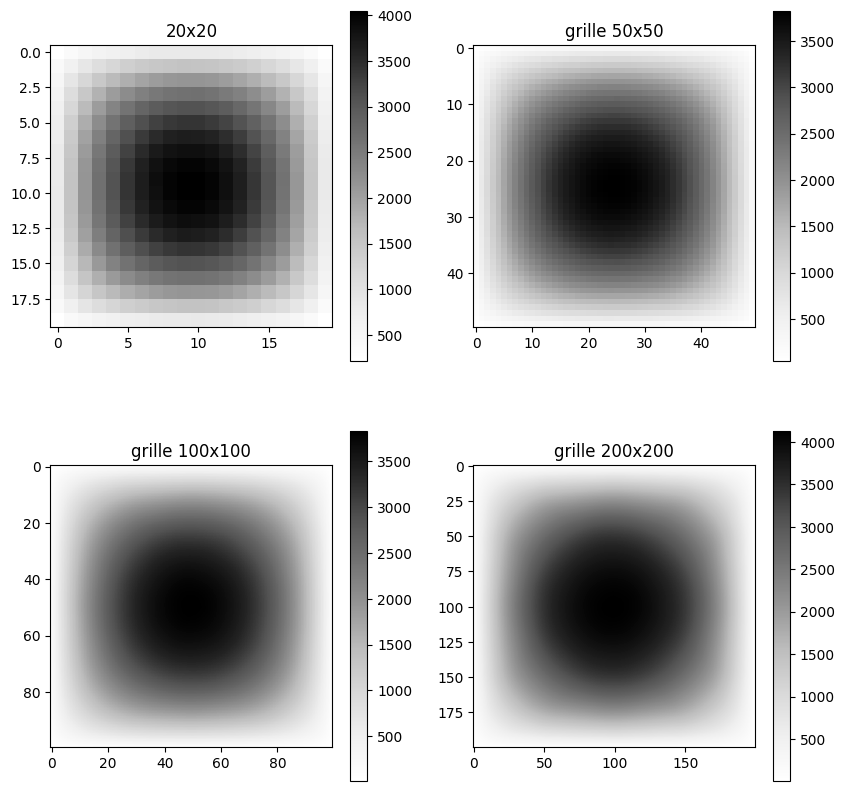

In [12]:
plt.figure(figsize=[10,10])

plt.subplot(2,2,1)
plt.imshow(tas20.topple_profil, cmap='Greys')
plt.title('20x20')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(tas50.topple_profil, cmap='Greys')
plt.title('grille 50x50')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(tas100.topple_profil, cmap='Greys')
plt.title('grille 100x100')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(tas200.topple_profil, cmap='Greys')
plt.title('grille 200x200')
plt.colorbar()

plt.show()

On obtient une tâche, pour les différentes tailles de grilles la majorité des éboulements semble se produire au centre de la grille (de l'ordre de 800 éboulements lors des 10000 itérations).

Pour une meilleure visualisation, on peut exploiter la symétrie apparente de la figure et tracer uniquement le nombre d'éboulements sur la diagonale principale de la grille 200x200.

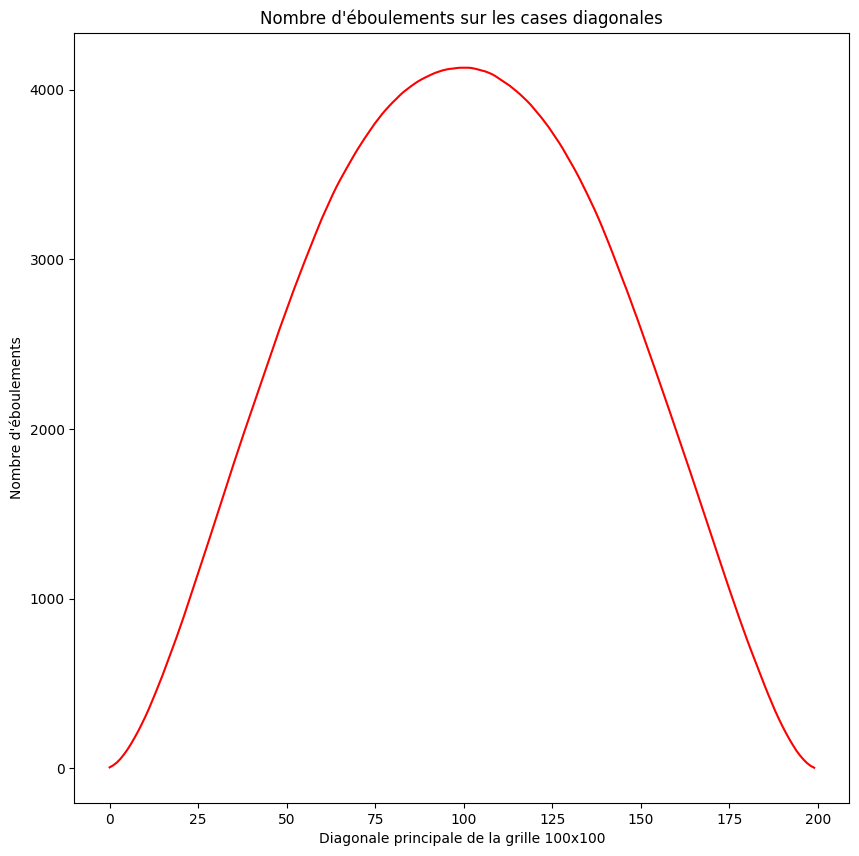

In [13]:
plt.figure(figsize=[10,10])
plt.plot( np.diag(tas200.topple_profil),'r' )
plt.title("Nombre d'éboulements sur les cases diagonales")
plt.ylabel("Nombre d'éboulements")
plt.xlabel('Diagonale principale de la grille 100x100')
plt.show()

#### Relation taille-fréquence des avalanches :

${} \;$

Un autre aspect intéressant à étudier est la relation taille - fréquence des avalanches, visualisons cette relation pour nos 4 grilles :

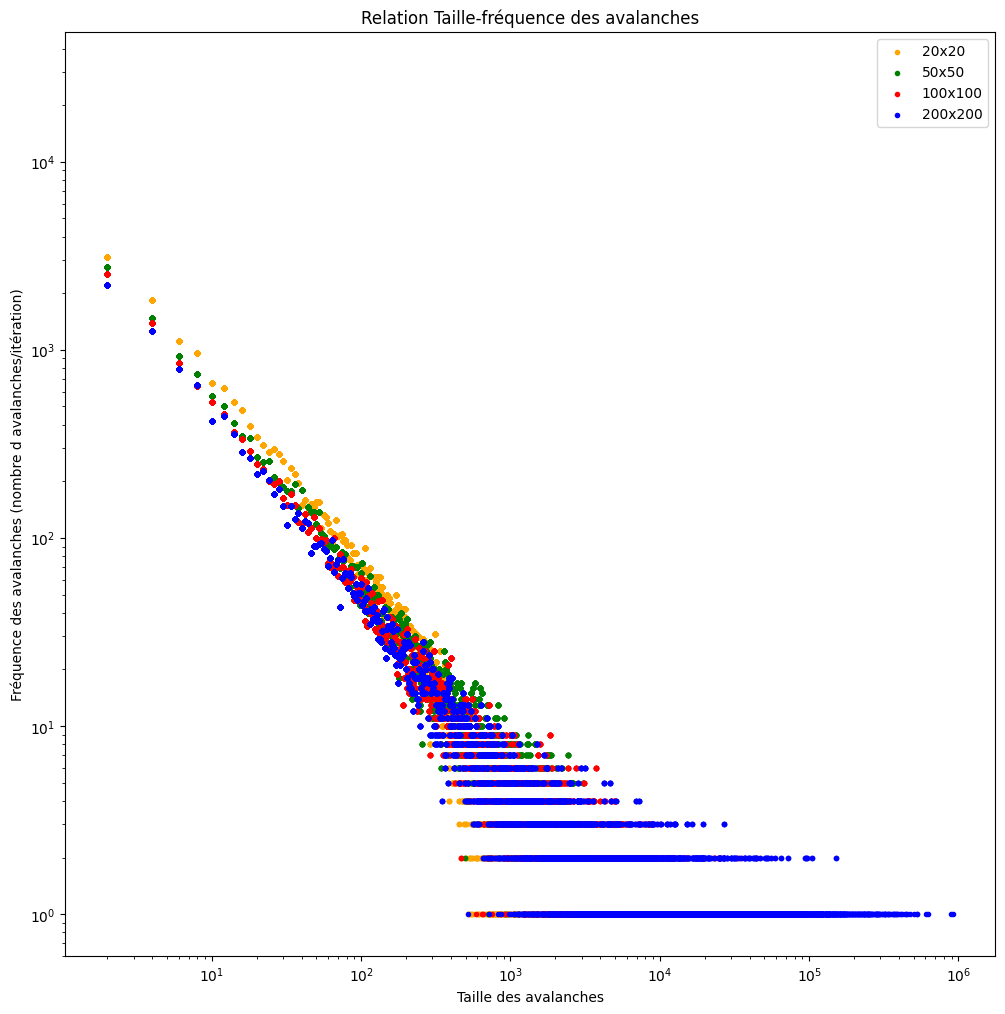

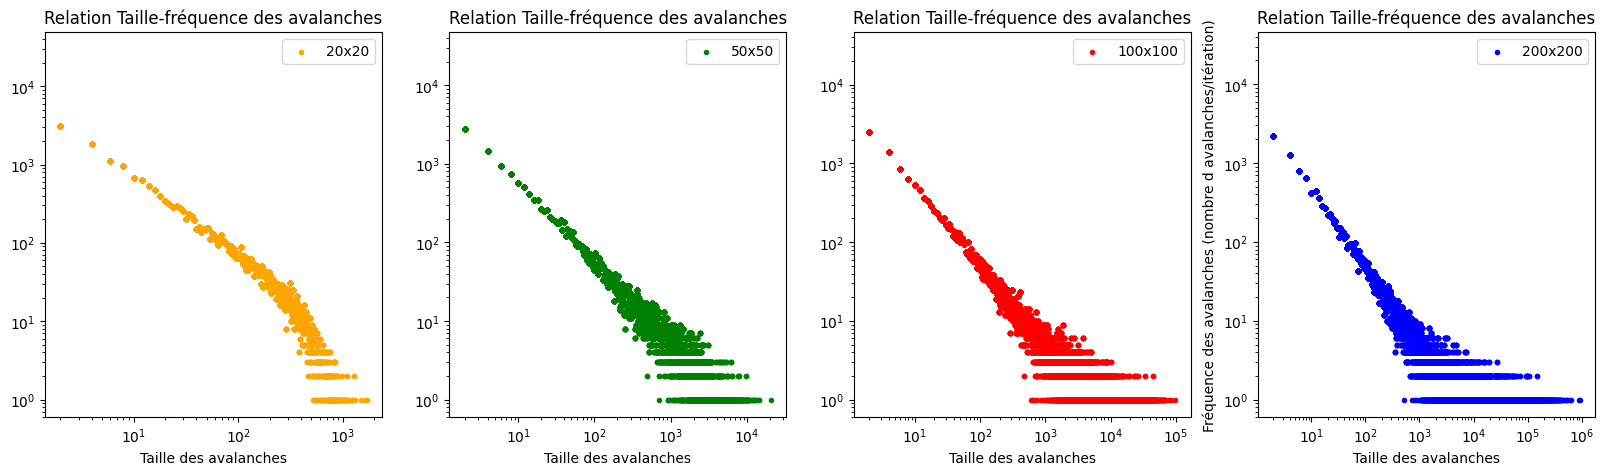

In [14]:
# Superposition

plt.figure(figsize=[12,12])

plt.scatter(taille20,freq20,label='20x20',marker='.',c='orange')
plt.scatter(taille50,freq50,label='50x50',marker='.',c='g')
plt.scatter(taille100,freq100,label='100x100',marker='.',c='r')
plt.scatter(taille200,freq200,label='200x200',marker='.',c='b')
plt.xlabel('Taille des avalanches')
plt.ylabel('Fréquence des avalanches (nombre d avalanches/itération)')
plt.title('Relation Taille-fréquence des avalanches')
plt.loglog()
plt.legend()

plt.show()

# Graphes affichés séparémment

plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
plt.scatter(taille20,freq20,label='20x20',c='orange',marker='.')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.subplot(1,4,2)
plt.scatter(taille50,freq50,label='50x50',c='g',marker='.')
plt.loglog()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')
plt.legend()

plt.subplot(1,4,3)
plt.scatter(taille100,freq100,label='100x100',c='r',marker='.')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.subplot(1,4,4)
plt.ylabel('Fréquence des avalanches (nombre d avalanches/itération)')
plt.scatter(taille200,freq200,label='200x200',marker='.',c='b')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.show()


*Remarques :*

Sur les 4 graphiques la courbe semble suivre 2 régimes, un premier régime linéaire pour des avalanches de taille $<100$ éboulements, et un second régime ou les point s'écartent de cette courbe affine. Ce second régime est en réalité dû aux effets de bords (grille de taille finie). 

Nous allons réaliser un ajustement de ces données par une loi de puissance $y=Kx^{a}$ en se restreignant au domaine sans effets de bords (donc pour des tailles d'avalanches $<100$ éboulements).

On définit pour cela la fonction `Fit_puissance` qui réalise l'ajustement linéaire $\quad \ln(y) = a\ln(x) + b\quad $  avec $b=\ln(K)$ et qui renvoie les paramètres $a$ et $b$ et leurs erreurs associées $u(a)$ et $u(b)$ ainsi que le coefficient de détermination de l'ajustement $R^2$.

In [22]:
# On se restreint au domaine sans effets de bords,
# Soit pour des avalanches de moins de 100 étapes

def Fit_puissance(x,y,string_size='', plot=False):

    # On se restreint au domaine sans effets de bords,
    # Soit pour des avalanches de moins de 100 étapes
    X = np.log(x[(x>0) & (x<100)])
    Y = np.log(y[(x>0) & (x<100)])
    
    resultat_fit = linregress(X,Y)
    
    a = resultat_fit.slope     # coefficient directeur de la droite ajustée Y=f(X)
    err_a = resultat_fit.stderr     # erreur sur le coefficient directeur de la droite ajustée Y=f(X)
    b = resultat_fit.intercept    # ordonnée  à l'origine de la droite ajustée Y=f(X)
    err_b = resultat_fit.intercept_stderr   # erreur sur l'ordonnée  à l'origine de la droite ajustée Y=f(X)
    r2 = resultat_fit.rvalue ** 2     # coefficient de détermination de l'ajustement
    
    if plot:
        print('a'+string_size+' = %5.3f'%a,'+/-%5.3f'%err_a,
              ' | b' +  string_size + ' = %5.3f'%b,'+/- %5.3f'%err_b,' | r^2 = %5.3f'%r2,'\n')

    return a, b, err_a, err_b, r2

In [23]:
# On se restreint au domaine sans effets de bords
#t10_fit = taille10[(taille10>0) & (taille10<100)]
#freq10_fit = freq10[(taille10>0) & (taille10<100)]

t20_fit = taille20[(taille20>0) & (taille20<100)]
freq20_fit = freq20[(taille20>0) & (taille20<100)]

t50_fit = taille50[(taille50>0) & (taille50<100)]
freq50_fit = freq50[(taille50>0) & (taille50<100)]

t100_fit = taille100[(taille100>0) & (taille100<100)]
freq100_fit = freq100[(taille100>0) & (taille100<100)]

t200_fit = taille200[(taille200>0) & (taille200<100)]
freq200_fit = freq200[(taille200>0) & (taille200<100)]


print('Paramètres des ajustements \n')
a20, b20, err_a20, err_b20, r2_20 = Fit_puissance(taille20, freq20, '20', plot=True)
a50, b50, err_a50, err_b50, r2_50 = Fit_puissance(taille50, freq50, '50', plot=True)
a100, b100, err_a100, err_b100, r2_100 = Fit_puissance(taille100, freq100, '100', plot=True)
a200, b200, err_a200, err_b200, r2_200 = Fit_puissance(taille200, freq200, '200', plot=True)



Paramètres des ajustements 

a20 = -0.968 +/-0.001  | b20 = 8.776 +/- 0.001  | r^2 = 0.996 

a50 = -0.986 +/-0.000  | b50 = 8.624 +/- 0.001  | r^2 = 0.997 

a100 = -1.001 +/-0.000  | b100 = 8.558 +/- 0.001  | r^2 = 0.997 

a200 = -0.984 +/-0.001  | b200 = 8.427 +/- 0.002  | r^2 = 0.995 



*Remarques :*

* Dans tous les cas on trouve un coefficient de détermination $R^2 \approx 1$ qui indique que l'ajustement colle bien aux données.

* On trouve un coefficient $b$ décroissant avec la taille de la grille.

* Le plus intéressant réside dans le paramètre $a$, on trouve dans tous les cas de valeurs proches $a\approx -1$

${} \;$

On extrapole que pour les grilles carrées (de taille $10\leq n \leq 100$) on aura :

$$ \boxed{    \textbf{Taille des avalanches} \propto \dfrac{1}{\textbf{fréquence}}     } $$

L'importance et la profondeur de ce résultat sera explicitée à la section suivante.

${} \;$


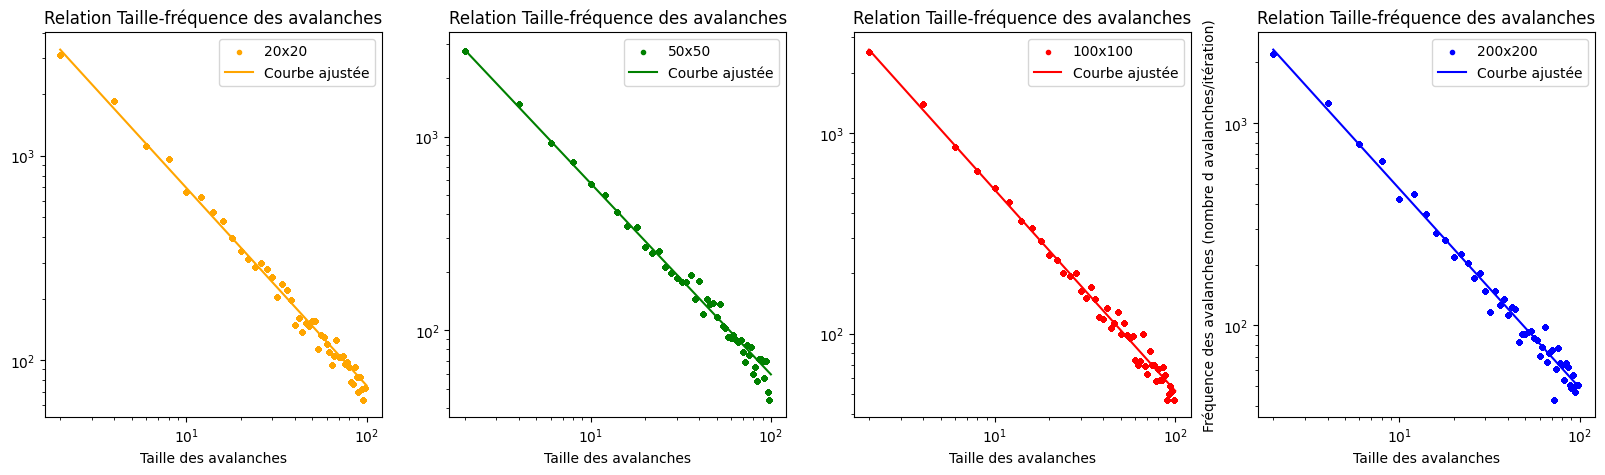

In [24]:
# Superposons les graphes des tailles des avalanches en fonction de leurs fréquences à leurs lois de puissance ajustées



def restrict(size, frequency):
    return size[(size>0) & (size<100)], frequency[(size>0) & (size<100)]


t20_fit, freq20_fit = restrict(taille20, freq20)
t50_fit, freq50_fit = restrict(taille50, freq50)
t100_fit, freq100_fit = restrict(taille100, freq100)
t200_fit, freq200_fit = restrict(taille200, freq200)


abcisses = np.linspace(2,100,1000,endpoint=True)

plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
plt.scatter(t20_fit,freq20_fit,label='20x20',c='orange',marker='.')
plt.plot(abcisses, np.exp(b20) * abcisses ** (a20) , 'orange',label='Courbe ajustée')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.subplot(1,4,2)
plt.scatter(t50_fit,freq50_fit,label='50x50',c='g',marker='.')
plt.plot(abcisses, np.exp(b50) * abcisses ** (a50) , 'g',label='Courbe ajustée')
plt.loglog()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')
plt.legend()

plt.subplot(1,4,3)
plt.scatter(t100_fit,freq100_fit,label='100x100',c='r',marker='.')
plt.plot(abcisses, np.exp(b100) * abcisses ** (a100) , 'r',label='Courbe ajustée')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.subplot(1,4,4)
plt.ylabel('Fréquence des avalanches (nombre d avalanches/itération)')
plt.scatter(t200_fit,freq200_fit,label='200x200',marker='.',c='b')
plt.plot(abcisses, np.exp(b200) * abcisses ** (a200), 'b' ,label='Courbe ajustée')
plt.loglog()
plt.legend()
plt.xlabel('Taille des avalanches')
plt.title('Relation Taille-fréquence des avalanches')

plt.show()

#### Distribution des tailles d'avalanches  :

${} \;$

Le dernier aspect que nous allons étudier est la probabilité notée $\mathbb{P}(s)$ d'avoir une avalanche de taille $s$. Pour alléger les calculs nous allons étudier cette distribution uniquement pour la grille 100x100.

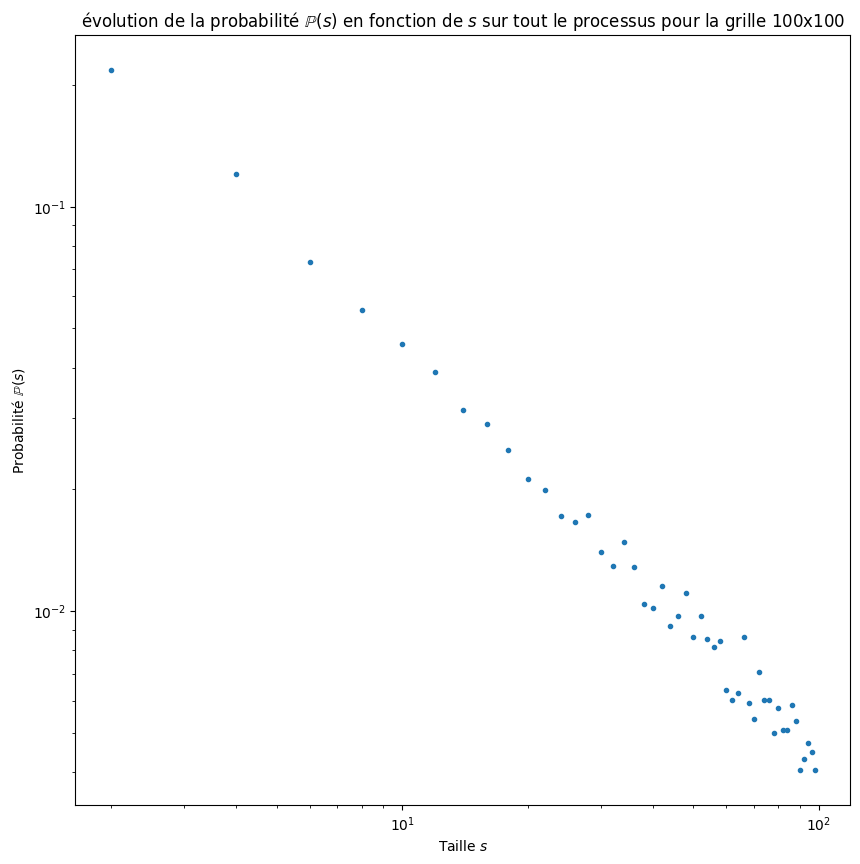

In [25]:
proba = []

tab_tailles = np.unique(t100_fit)    # tableau contenant les tailles des avalanches produites lors du processus

for taille in tab_tailles:
    
    proba.append( np.sum(t100_fit==taille) / len(t100_fit) )     
    
    # On applique la formule de la probabilité d'un événement dans un univers fini 
    
    # Soit   P(A) = Card(A) / Card(Omega)
    
    # Card(A) : np.sum(t100_fit==taille)
    # Card(Omega) : taille du tableau t100_fit

proba = np.array(proba)

plt.figure(figsize=[10,10])
plt.xlabel(r'Taille $s$')
plt.ylabel(r'Probabilité $\mathbb{P}(s)$')
plt.scatter(tab_tailles, proba,marker='.')
plt.title(r'évolution de la probabilité $\mathbb{P}(s)$ en fonction de $s$ sur tout le processus pour la grille 100x100')
plt.loglog()
plt.show()



${} \;$

De même que précédemment on distingue une courbe affine, ajustons ces données à une loi de puissance $\quad \ln( \mathbb{P}(s) )= \alpha \ln(s) + c$ 

${} \;$


In [27]:
alpha, c, err_alpha, err_c, r2_proba =  Fit_puissance(tab_tailles, proba)

print("Paramètres de l'ajustements \n")
print('alpha = %5.3f'%alpha,'+/- %5.3f'%err_alpha)
print('c = %5.3f'%c,'+/-%5.3f'%err_c)
print('r^2 = %5.3f'%r2_proba)

Paramètres de l'ajustements 

alpha = -1.015 +/- 0.016
c = -0.766 +/-0.058
r^2 = 0.989


${} \;$

Le coefficient de détermination $R^2 \approx1$, l'ajustement correspond bien aux données.

On trouve un paramètre $\alpha \approx -1$. Ainsi nous avons de manière approchée :

$$ \boxed{  \mathbb{P}(s) \propto \dfrac{1}{s}  } $$

${} \;$ 

Ce résultat a été démontré par Deepak Dhar [4], dans le cas d'un graphe infini $\mathbb{P}(s)$ converge vers $\dfrac{1}{s}$ quand $s$ augmente.  

${} \;$


----------------

## IV.c- Tas de sable abélien et sismologie :

${} \;$

Nous avons présenté le système modélisé de manière générale et nous ne nous sommes par attardé sur sa nature réelle. 

${} \;$


Un exemple concret qui satisfait à la description du système modélisé est **une plaque tectonique.** 

${} \;$

Avant tout, il convient de passer du vocabulaire du tas de sable à celui de la sismologie :

* Les perturbations extérieures correspondent au mouvement des plaques tectoniques voisines.

* L'ajout de grains de sable correspond à **l'ajout de contraintes mécaniques sur les zones liaisons de la plaque avec ses voisines**.

* Les éboulements se produisent lorsque **la force de frottement solide statique ne suffit plus à compenser les contraintes mécaniques**.

* Une avalanche correspond à **un séisme**.

* Enfin, la taille des avalanches peut être interprétée comme **l'énergie libérée par le séisme** que l'on notera $E_\ell$.

${} \;$



<center><img src="Images/PlaqueModelisation.png" width="700" />


${} \;$

Schéma de la modélisation "Masse-Ressort" d'une plaque tectonique.

${} \;$

Comparons les résultats de la simulation numérique aux lois utilisées en sismologie.


#### Relation fréquence-Magnitude :

Nous avons trouvé la relation : $\quad \quad  \textbf{Taille des avalanches} \propto \dfrac{1}{\textbf{fréquence}} $

C'est-à-dire que l'énergie libérée $E_\ell$ par le séisme est proportionnelle à l'inverse de sa fréquence. $\quad \quad f \propto \dfrac{1}{E_\ell}$

En sismologie il est d'usage de parler de **magnitude** d'un séisme $M$, il existe plusieurs types de magnitudes la plus connue est celle de Richter $M_L$ (pour magnitude locale) qui est définie de la manière suivante :

$$M_L = \log_{10} \left ( \dfrac{A}{A_0} \right) + c\log_{10}(\Delta)  $$

$A$ étant l'amplitude maximale mesurée par le sismogramme, $A_0$ une amplitude de référence, $\Delta$ la distance de lieu de mesure à l'épicentre ($\Delta$ doit être entre $0\mathrm{km}$ et $100\mathrm{km}$ d'où le nom de magnitude locale) et enfin $c$ une constante d'étalonnage.

Le type de magnitudes utilisé sont les magnitudes de moment $M_m = \log(m_0)$, $m_0$ étant le moment sismique. Ce concept a été introduit en 1964 par le sismologue japonais Keiiti Aki[6]. Les épicentres des séismes étant généralement situés à grande distance de la surface de la Terre par rapport aux longueurs d'onde des ondes sismiques émises, on peut ainsi assimiler l'énergie libérée $E_\ell$ à l'énergie d'un couple de forces de moment $m_0$ dont l'expression est :

$$ m_0 = \mu S \Delta u $$

Avec $\mu$ le module de cisaillement du milieu, $S$ la surface rompue durant le séisme et $\Delta u$  le déplacement moyen ayant eu lieu sur la faille. Le moment sismique est une mesure directe de l'énergie libérée $E_\ell$. 

${} \;$

On voit que pour les différents types, la magnitude est toujours reliée au logarithme de l'énergie libérée.

$$ M \propto \ln ( E_\ell ) $$

${} \;$

Ainsi, on peut écrire la relation précédente sous la forme :

$$ \boxed{ \ln(f) = cste - M } $$


${} \;$

Il s'agit précisément de la **Loi de Gutenberg-Richter** qui est loi empirique utilisé en sismologie formulée en 1949 par les sismologues Beno Gutenberg et Charles Francis Richter et qui énonce que :

$$ \ln\left[ N(M>M_0) \right ] = a - bM $$

$N(M>M_0)$ étant le nombre de séismes de magnitude $M>M_0$ par unité de temps, $a$ une constante qui varie avec le volume étudié et qui peut être interprétée comme un indicateur du taux de sismicité, et enfin **$b$ une constante proche de $1$** [7]. 


<center><img src="Images/Richter.PNG" width="650" />


Graphe taille-magnitude des séismes sur une année[8]. La déviation des points de faibles magnitudes par rapport à la Loi de Gutenberg-Richter est due à la difficulté de détection des séismes de faibles magnitudes. 


${} \;$

#### Distribution des tailles des avalanches :

Nous avons également vu que $\mathbb{P}(s)$ la probabilité d'avoir un séisme de magnitude $M \propto \ln(s)$ est de la forme : 

$$ \mathbb{P}(s) \propto \dfrac{1}{s} $$

${} \;$

Nous avons également vu qu'au cours de notre processus nous ne sommes pas repassées par l'état initial (l'élément neutre $e$), on peut considérer que l'état initial de notre plaque tectonique survient après un séisme de grande magnitude par rapport aux séismes produits au cours du processus de perturbation, ainsi on considère que **les séismes qui se sont produits au cours du processus sont des répliques du séisme initial.**

${} \;$


On retrouve ainsi une formule approchée de la **Loi d'Omori** qui est également une loi empirique formulée par le sismologue japonais Fusakichi Ōmori[9].

Cette loi énonce que l'activité sismique décroit après le séisme principal suivant une loi en $\; \dfrac{1}{t^\alpha}$, avec $t$ le temps écoulé après le séisme principal et $\alpha$ une constante comprise entre $0.9$ et $1.3$.

En prenant en compte les effets de bords qui entravent les données dus à la taille finie de notre grille 100x100, en plus du fait que le processus n'a pas été réalisé durant un nombre infini d'itérations, la valeur du coefficient $\; \alpha=1.01 \pm 0.5 \;$ que nous a donnée la simulation est satisfaisante pour affirmer que nous obtenons une formule approchée de la loi d'Omori.

${} \; $

-----------------

# V- Conclusion :

${} \;$

Ainsi, nous avons pu à partir du modèle BTW abélien retrouver des aspects de la dynamique qui caractérisent les plaques tectoniques exprimés par les lois de Gutenberg-Richter et d'Omori, les plaques tectoniques étant un exemple de système présentant une criticité auto-organisée.

${} \;$

L'intérêt de l'étude des systèmes présentant une criticité auto-organisée est la compréhension des phénomènes naturels, en effet elle est présente dans en sismologie comme nous l'avons abordé mais également dans d'autres phénomènes naturels (avalanches de neige, propagation des feux de forêts), en neurologie (avalanches neuronales dans le Cortex), en biologie (extinctions biologiques) et en dans la société (taille des villes)[2].


${} \; $

L'un des aspects dynamiques communs à ces systèmes est l'évolution de certains paramètres proportionnellement à l'inverse de leurs fréquences d'apparition tel que l'énergie libérée par les séismes. On peut également citer l'énergie cumulative des cyclones de l'océan Pacifique, la surface brulée par les feux de forêts en Californie, les tornades ainsi que les inondations aux États-Unis[10].


${} \; $




La théorie de la criticité auto-organisée est un sujet de recherche d'actualité, la question de savoir si elle est une théorie fondamentale reste encore ouverte.

Il est également à noter que notre modèle est une version restreinte de modèle originale BTW sur un graphe simple, les résultats fondamentaux tirés du modèle du tas de sable abélien ont été obtenus sur d'autres types de supports en considérant d'autres processus de perturbation (on peut citer l'étude de Deepak Dhar et Satya Majmudar du modèle sur une Bethe Lattice à partir de laquelle plusieurs résultats sur la dynamique des avalanches ont été obtenus[4]). Il existe également d'autres formalismes plus poussés sur ce modèle que nous n'avons pas abordé (polynômes d'avalanches, vecteurs d'éboulements) tout comme il existe d'autres modèles (modèle flèche hauteur[2], modèle des feux de forêts, modèle Bak-Sneppen...) qui permettent d'obtenir des résultats fondamentaux dans des cadres plus généraux.

----------------------------

# VI- Bibliographie :

${} \;$

[1] Per Bak, Chao Tang and Kurt Wiesenfeld. *Self-organized criticality: An explanation of the 1/f noise*, Physical Review Letters, 1987.

[2] Arnaud Dartois. *Au dela du tas de sable, un nouveau modèle combinatoire: Le modèle flèche-hauteur..*
Informatique [cs]. Ecole Polytechnique X, 2004.

[3] D. Dhar, P. Ruelle, S. Sen and D. Verma. *Algebraic aspects of abelian sandpile models*. Journal of Physics, 1995.

[4] Deepak Dhar and Satya Majmudar. *Abelian sandpile model on the Bethe lattice*. Journal of Physics, 1990.

[5] Image tirée du site : https://www.researchgate.net/figure/llustration-of-the-two-dimensional-slider-block-model-An-array-of-blocks-each-with-mass_fig4_280945392

[6] Hiroo Kanamori. *The energy release in great earthquakes*. Journal of Geophysical Research, 1979.

[7] C. Godano, E. Lippiello and L. de Arcangelis. *Variability of the $b$ value in the Gutenberg–Richter distribution*. Geophysical Journal International, 2014.

[8] K. Christensen, L. Danon, T. Scanlon and P. Bak. *Unified scaling law for earthquakes.* In Proceeding of the National Academy of Science of the USA, 2002.

[9] A. V. Guglielmi. *Omori's law: a note on the history of geophysics*. Physics-Uspekhi, 2017

[10] Exmples extraits du site https://www.chds.us/ed/california-on-fire-an-illustration-of-self-organized-criticality/

${} \; $   